In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import tifffile as tiff
import cv2
import numpy as np
from csbdeep.utils import normalize
import sys
from pathlib import Path
from PIL import Image
import imageio.v3 as iio
from IPython.display import HTML, Video
from csbdeep.utils import normalize
import pandas as pd

sys.path.append(str(Path("..").resolve()))
from src import *

# Visualize OABF Dataset  (Resonant Neuro)
In this notebook we're going to load the "Resonant Neuro" recording of the OABF dataset. The dataset comprises 2 versions of the same footage:
1. *Raw* measurements
2. *Motion corrected* processed

In [ ]:
dataset = DATASETS_DIR["oabf_resonant_neuro"]
sample_dir = SAMPLE_DIR

raw_file = dataset / "raw/???.tif" # Not downloaded

motion_corrected_file = dataset / "motion_corrected/TSeries-04252023-1030-2156_Ch2__longitudinal_avg.tiff"
motion_corrected_sample_file = sample_dir / "motion_corrected" / "oabf_resonant_neuro.tiff"

## Extract Samples

### 1. Raw measurement

In [ ]:
# 3m
raw = Recording(raw_file)

### 2. Motion corrected

In [ ]:
# 4m
motion_corrected = Recording(motion_corrected_file)
motion_corrected.save_sample(motion_corrected_sample_file, length=1_000)

## Visualize values distribution

The values distribution is exponential

In [6]:
motion_corrected=Recording(motion_corrected_sample_file)

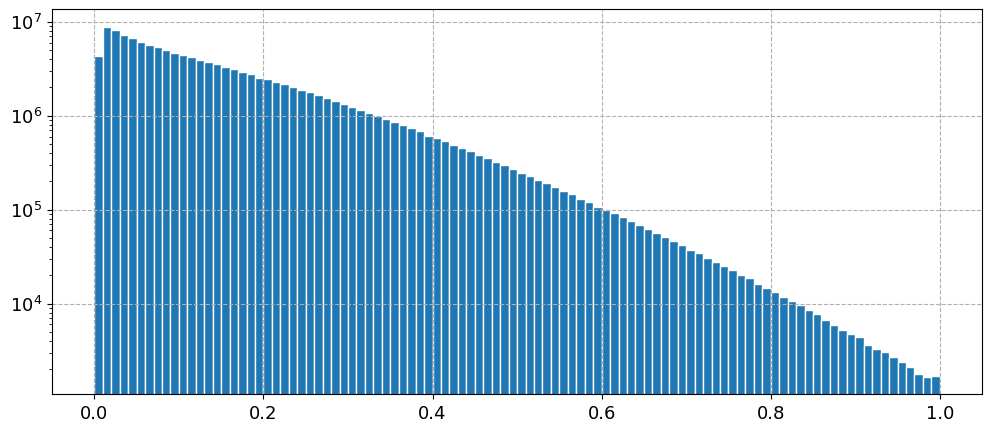

In [7]:
pd.Series(motion_corrected.video.flatten()).hist(figsize=(12, 5), bins=100,edgecolor='white')
plt.yscale("log")

## Export motion corrected slice as video

In [ ]:
filename="resonant_neuro_motion_corrected.mp4"
motion_corrected.render(filename)
Video(filename)